Implement the Upper Confidence Bound (UCB) algorithm and compare its performance with the Epsilon-Greedy algorithm.

In [3]:
import random
import numpy as np

number_of_arms = 10
number_of_rounds = 1000
epsilon = 0.1

true_probabilities = np.random.rand(number_of_arms)
print(f"True Probabilities : {true_probabilities}")

True Probabilities : [0.09016651 0.3995841  0.91129048 0.21822625 0.637577   0.37204381
 0.40736855 0.23962163 0.46027153 0.27859171]


In [8]:
# UCB algorithm variables
estimated_ucb_rewards = np.zeros(number_of_arms)
ucb_counts = np.zeros(number_of_arms)
total_ucb_reward = 0
ucb_rewards = np.zeros(number_of_rounds)
cumulative_ucb_regret = np.zeros(number_of_rounds)

In [13]:
# Epsilon-Greedy variables
estimated_greedy_rewards = np.zeros(number_of_arms)
greedy_counts = np.zeros(number_of_arms)
total_greedy_reward = 0
greedy_rewards = np.zeros(number_of_rounds)
cumulative_greedy_regret = np.zeros(number_of_rounds)

In [9]:
# Optimal strategy variables
best_arm = np.argmax(true_probabilities)
optimal_reward = 0
optimal_rewards = np.zeros(number_of_rounds)

In [10]:
# UCB Algorithm implementation
for t in range(number_of_rounds):
    if t < number_of_arms:
        arm_ucb = t
    else:
        ucb_values = estimated_ucb_rewards + np.sqrt((2 * np.log(t + 1)) / ucb_counts)
        arm_ucb = np.argmax(ucb_values)

    reward_ucb = np.random.rand() < true_probabilities[arm_ucb]

    ucb_counts[arm_ucb] += 1
    estimated_ucb_rewards[arm_ucb] += (reward_ucb - estimated_ucb_rewards[arm_ucb]) / ucb_counts[arm_ucb]

    total_ucb_reward += reward_ucb
    ucb_rewards[t] = reward_ucb

    optimal_rewards[t] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[t]
    cumulative_ucb_regret[t] = optimal_reward - total_ucb_reward

print(f"UCB Rewards : {np.sum(ucb_rewards)}")
print(f"UCB Cumulative Regret : {np.sum(cumulative_ucb_regret)}")
print(f"Optimal Reward : {np.sum(optimal_rewards)}")

UCB Rewards : 763.0
UCB Cumulative Regret : 100389.88418748298
Optimal Reward : 911.2904778970703


In [14]:
# Epsilon-Greedy Algorithm
for t in range(number_of_rounds):
    if np.random.rand() < epsilon:
        greedy_arm = random.randint(0, number_of_arms - 1)
    else:
        greedy_arm = np.argmax(estimated_greedy_rewards)

    reward_greedy = np.random.rand() < true_probabilities[greedy_arm]

    greedy_counts[greedy_arm] += 1
    estimated_greedy_rewards[greedy_arm] += (reward_greedy - estimated_greedy_rewards[greedy_arm]) / greedy_counts[greedy_arm]

    total_greedy_reward += reward_greedy
    greedy_rewards[t] = reward_greedy

    optimal_rewards[t] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[t]
    cumulative_greedy_regret[t] = optimal_reward - total_greedy_reward

print(f"Epsilon Greedy Rewards : {np.sum(greedy_rewards)}")
print(f"Epsilon Greedy Cumulative Regret : {np.sum(cumulative_greedy_regret)}")
print(f"Optimal Reward : {np.sum(optimal_rewards)}")

Epsilon Greedy Rewards : 853.0
Epsilon Greedy Cumulative Regret : 954602.3620845955
Optimal Reward : 911.2904778970703


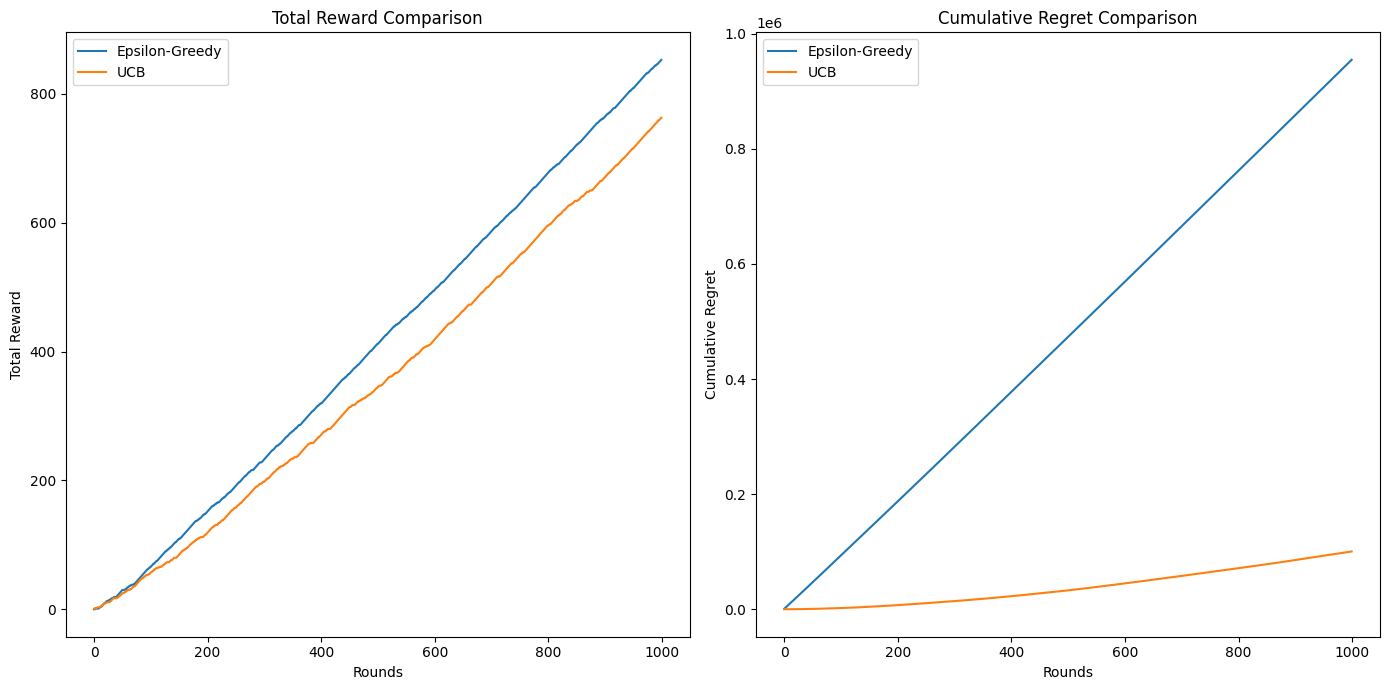

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Total Rewards
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(greedy_rewards), label='Epsilon-Greedy')
plt.plot(np.cumsum(ucb_rewards), label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Total Reward')
plt.title('Total Reward Comparison')
plt.legend()

# Cumulative Regret
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(cumulative_greedy_regret), label='Epsilon-Greedy')
plt.plot(np.cumsum(cumulative_ucb_regret), label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Comparison')
plt.legend()

plt.tight_layout()
plt.show()